### Import libraries

In [1]:
import os
import sys
sys.path.append("..")
from model import experimental_model, experimental2d_model, grapher
from data import batch_creator, loader
from helpers import helpers, plotter, metrics
import tensorflow as tf
import time
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# options: rbf, periodic
print('Kernel? rbf/rbf_noise/periodic/rbf_const_2D/rbf_rbf_2D')
kernel = input()
print('How many observations? (deafult 150000)')
dataset_size = input()
print('Do you want to overwrite data? True/False')
rewrite = input()
d = True if kernel.split('_')[-1] == '2D' else False
save_dir = os.path.expanduser('~/Downloads/GPT_' + kernel)

Kernel? rbf/rbf_noise/periodic/rbf_const_2D/rbf_rbf_2D
rbf_const_2D
How many observations? (deafult 150000)
1
Do you want to overwrite data? True/False
False


In [3]:
data = loader.load_data(kernel, size = dataset_size, rewrite = rewrite.capitalize(), diff_x= True, noise = False, d = d, ordered = True)

['em_te_2.npy', 'pad_pos_tr.npy', 'pad_pos_te.npy', 'em_te.npy', 'em_tr.npy', 'pad_y_fren_tr.npy', 'pad_y_fren_te.npy', 'em_tr_2.npy']


In [4]:
a = data[-4][1, :10].reshape(1, -1)

In [5]:
b = data[1][1, :10].reshape(1, -1)

In [6]:
c = data[-3][1, :10].reshape(1, -1)

In [7]:
dd = data[-1][1, :10].reshape(1, -1)

In [8]:
a

array([[264., 244., 340., 289., 314., 265., 254., 249., 285., 242.]])

In [9]:
b

array([[ 7.30813801,  5.38459099, 14.91017682,  9.8774689 , 12.35579582,
         7.4977443 ,  6.36305617,  5.85732549,  9.41111518,  5.15314729]])

In [10]:
c

array([[ 1.42948886,  3.97891532,  3.30185699, -0.46714584, -2.88594971,
        -3.64957459,  3.47368   , -0.58534392, -1.17222729, -0.57185026]])

In [11]:
dd

array([[0., 0., 0., 1., 1., 1., 0., 1., 1., 1.]])

In [12]:
batch_creator.create_batch_2d(a, b, c, dd, batch_s=1, context_p=2)

p:  0.7476814256194122


([array([[-0.57185026,  3.97891532, -0.58534392,  3.47368   ,  1.42948886,
           3.30185699, -3.64957459, -1.17222729, -0.46714584, -2.88594971]]),
  array([[ 5.15314729,  5.38459099,  5.85732549,  6.36305617,  7.30813801,
          14.91017682,  7.4977443 ,  9.41111518,  9.8774689 , 12.35579582]]),
  array([[242., 244., 249., 254., 264., 340., 265., 285., 289., 314.]]),
  array([[1., 0., 1., 0., 0., 0., 1., 1., 1., 1.]])],
 [6])

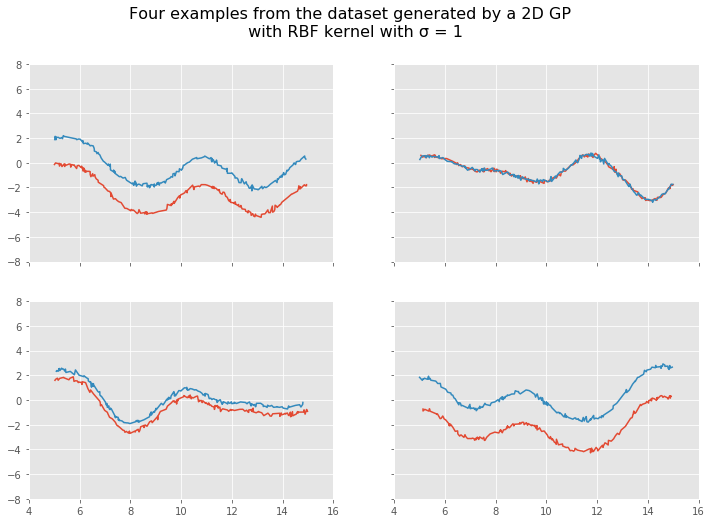

In [13]:
if d:
    plotter.plot_2d_examples(data[2], data[-2], data[0])
else:
    plotter.plot_examples(data[0], data[4])

In [14]:
train_step, test_step, loss_object, train_loss, test_loss, m_tr, m_te = grapher.build_graph()

In [15]:
# batch_x_tr, batch_tar_tr, _ = batch_creator.fake_batch(pad_x_tr, pad_y_fren_tr, batch_s=1)

Already exists
Restored from /Users/omernivron/Downloads/GPT_rbf_const_2D/ckpt/check_run_101/ckpt-6
p:  0.04687412210243147
0
[-0.0051704850097165841 -0.044107085131639169 -0.0047592831267199761 ... -0.013379096254027185 -0.02268119330630939 -0.034992766782528446]
p:  0.37008950346046443
1
[0.023485515082862382 0.016776127176875318 0.049517857254439836 ... -0.030236571957413312 0.0048286810449280348 0.026940765148544803]


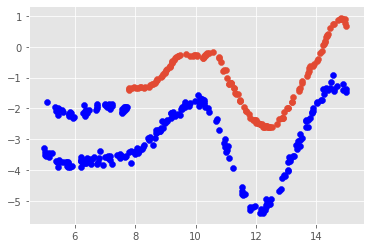

Epoch 0 batch 0 train Loss 0.3093 test Loss 0.4802 with training MSE metric 0.7036 and testing MSE metric 1.0068
learning rate is 0.0003000000142492354
r squared training, series 0: 0.2829770700663705, series 1: 0.15838867349173896
r squared testing, series 0: 0.302432125691985, series 1: 0.24549289501774607
p:  0.9472964235592722
0
[-0.0053679882674047118 -0.044247857417022404 -0.0046979945647318807 ... -0.013227462466993304 -0.022769874081543389 -0.0350627813234294]
p:  0.54814880529667
1
[0.023547401809590616 0.016880465136272043 0.049567285063545706 ... -0.030303505780981337 0.0048860286986067781 0.027044535681738376]
p:  0.24769376387806274
1
[0.023615333825845953 0.017012344887048843 0.049691128425506138 ... -0.030389831573940158 0.004988283051767144 0.027163086449907295]
p:  0.8997770219644161
1
[0.023676511960402675 0.017131112996582227 0.049802659133165963 ... -0.030467574754424305 0.0050803711562849877 0.02726985076059029]
p:  0.47954099807949313
1
[0.023726326205634207 0.017

p:  0.9490694294844982
1
[0.023965091949849755 0.017694888261914826 0.050623739549704908 ... -0.030899983383473419 0.00561528078512817 0.027726059964824058]
p:  0.1174392920334375
0
[-0.0062703042403062237 -0.044924698533147227 -0.0050314753109451582 ... -0.012174876197407286 -0.023202496378966677 -0.03603125566716478]
p:  0.01715650499919663
1
[0.023816051673102127 0.01751485428419618 0.050525158239607425 ... -0.030837443566124723 0.0054826420133876515 0.027562570494326345]
p:  0.445139706633059
0
[-0.006037636225618901 -0.0447624756901105 -0.00511239653403344 ... -0.012319805917260011 -0.023057288401813529 -0.035981308452674624]
p:  0.6402840615823466
1
[0.023695174332647992 0.017368839871558017 0.05044520504311626 ... -0.03078672139206258 0.005375066916869578 0.027429974305917697]
p:  0.015965033037478316
0
[-0.0057547977227487192 -0.044540252479840732 -0.0051378439872092089 ... -0.012522886550660094 -0.022856778114114046 -0.03582047514817293]
p:  0.04151520304505252
1
[0.0235368802

p:  0.7170635940344441
0
[-0.0057264631890547556 -0.044510078253888335 -0.00507474244127803 ... -0.012444210733651864 -0.022820081567947893 -0.035795660322637826]
p:  0.3969701138174542
1
[0.023328421929558835 0.016871021100108539 0.050221115337622024 ... -0.030682259196164682 0.0050945284001402379 0.027023183403514232]
p:  0.6781176348399407
1
[0.023317836640897878 0.016858339327583113 0.05020836647296556 ... -0.030692403126166987 0.0050890721237975035 0.027010711149815528]
p:  0.7346637409516369
0
[-0.0058581608567083695 -0.044563555027390477 -0.0050868036554535291 ... -0.012295345160327013 -0.022869914392974113 -0.035868829286813841]
p:  0.1199550173098487
0
[-0.0058905483680433872 -0.044573201658059031 -0.0050839253347471289 ... -0.012260659497135349 -0.022874127268960463 -0.035881977647180666]
p:  0.9980164142841605
0
[-0.0059187449665018431 -0.044589953855435654 -0.0050518398751372706 ... -0.012238312529713523 -0.02286668497204054 -0.035887445607334929]
p:  0.9265624777992437
0
[

p:  0.17686423568779375
0
[-0.0059811005974123085 -0.044565838698862076 -0.0047180549463735214 ... -0.012194676778225834 -0.022725667180395395 -0.0357438900254539]
p:  0.007722141973479424
0
[-0.0059968991311756684 -0.044589408872146685 -0.0046357861583653679 ... -0.012172229565459681 -0.022733002001796235 -0.035728624585601637]
p:  0.6009234905801112
0
[-0.0060377319870824958 -0.044620844352833131 -0.0046131140337690437 ... -0.012106130091256785 -0.022791361336723628 -0.035760519198023817]
p:  0.571824490741333
0
[-0.0060745049495825607 -0.044649154294113987 -0.0045926961335117809 ... -0.012046602697695094 -0.022843918170790879 -0.035789242620759644]
p:  0.4038361102167868
0
[-0.0061076216764661849 -0.044674649454966825 -0.0045743083297144424 ... -0.011992993950975609 -0.022891249421780002 -0.035815110151611491]
p:  0.7025775188837226
1
[0.023791384555442323 0.017066596675866883 0.049430563734404111 ... -0.031010626794812767 0.00505733208158655 0.027119545427934436]
p:  0.854329802770

p:  0.17766203340993303
0
[-0.0059124975539828891 -0.044393650784380914 -0.0045026102001219856 ... -0.012146298480711039 -0.022770042061113473 -0.035665693207572922]
p:  0.1568047789881486
0
[-0.0060044731426433925 -0.04445880242233255 -0.0045241472117333306 ... -0.012048519931179943 -0.022853351467288979 -0.035742168294375161]
p:  0.5468628261054268
1
[0.023851595139947914 0.017408533423539797 0.049467114054876117 ... -0.031290350294902063 0.0050287255817690656 0.02740860168261703]
p:  0.9200795971943678
1
[0.023860303929003551 0.017394767410606981 0.04944187775199816 ... -0.031299292689529842 0.0050071388448135138 0.027405995130965484]
p:  0.9125907605274041
1
[0.023885343836933075 0.017417397333149679 0.049454091738705283 ... -0.031316744252519381 0.0050090483784998646 0.027438238830594746]
p:  0.6147276387943522
0
[-0.0061426950808338258 -0.04448324836131206 -0.0046992913315893345 ... -0.011887961267730091 -0.023044903730597803 -0.035962609428025566]
p:  0.5196707469203677
1
[0.023

p:  0.41238610588340485
1
[0.023709589654067595 0.017357231038225923 0.049661115891918621 ... -0.031332615021656171 0.0049851000065891816 0.027468863554460075]
p:  0.2381153319254503
1
[0.023683385601411422 0.017312936863250594 0.049611664418666261 ... -0.031312705342088132 0.0049430857669754075 0.027431481356249877]
p:  0.4229743211828144
0
[-0.0057955862645612507 -0.044050218131200705 -0.004963529833908637 ... -0.012192079057540786 -0.022807599089588119 -0.035821207461865741]
p:  0.9897487763628569
0
[-0.0057616653426469126 -0.044014390682338721 -0.0050661353187311815 ... -0.012192886605285079 -0.022821957851572754 -0.035864064871403173]
p:  0.22963609806281715
0
[-0.0057311172051163744 -0.04398212558534307 -0.0051585386572164816 ... -0.012193613857910891 -0.022834888910359206 -0.035902660934288073]
p:  0.7208294360952857
1
[0.023722812114140259 0.017341866573983608 0.049539003592336525 ... -0.031328013006564015 0.0048985360329921769 0.027437661749172011]
p:  0.3969611356624724
0
[-0

p:  0.5172747623673757
0
[-0.0055651157370637467 -0.043845221802374018 -0.0052001897311979139 ... -0.012317352506021265 -0.022747081307242366 -0.035731114946689006]
p:  0.03914221855018851
0
[-0.005579942999074299 -0.043861382295787808 -0.0051922083763166612 ... -0.012301799828192996 -0.022757984733699978 -0.035722034716857538]
p:  0.9459602871106558
1
[0.02380773427066437 0.017573818169266977 0.049967711552880212 ... -0.031582038897911995 0.00511879169909762 0.027833272665664033]
p:  0.610911697762068
1
[0.023855748923044151 0.017600872351783814 0.049949376106046772 ... -0.03160026943215978 0.005123544201807554 0.027873585699151042]
p:  0.12981943034651122
0
[-0.0058261753707671369 -0.044076303355278318 -0.0050870132995123381 ... -0.011992290030367822 -0.022943463158881242 -0.035814322055051959]
p:  0.30376441128145226
0
[-0.005896068810270846 -0.044127663435501868 -0.0050448763120023452 ... -0.011893434449493378 -0.022994282318248922 -0.035829252654640695]
p:  0.4322532814717759
1
[0

p:  0.49118497205563383
1
[0.023923055202454371 0.017442906479829053 0.049400696114029974 ... -0.031590799788100685 0.0048461138835490438 0.027813576762368356]
p:  0.8153521812773613
1
[0.023930202029357073 0.017446283298102928 0.049390751503162258 ... -0.031593545674486308 0.0048430874381925788 0.027864973158819056]
p:  0.7319097808285286
0
[-0.005291665521758717 -0.0435734577275005 -0.0047213343779882013 ... -0.012486709892181612 -0.022454002423862113 -0.03514468504276809]
p:  0.038463241054844444
1
[0.023968056328228904 0.017527171939735332 0.04948768675040182 ... -0.031629447899560556 0.0048801005250637278 0.028066851006036203]
p:  0.11500386590586786
1
[0.023961492765341531 0.017545634088552382 0.049540539099479038 ... -0.031640188065224464 0.004891556899556236 0.02815108294420527]
p:  0.30172969975923014
0
[-0.0054399966539839814 -0.043720175453819975 -0.0046848176010124282 ... -0.01231678566309077 -0.022536079567745584 -0.035198351698370739]
p:  0.6864758757926169
1
[0.023950258

p:  0.9106871836429467
1
[0.024076675995904948 0.0179555222533631 0.0500691171148072 ... -0.031902577886443378 0.0051857439752993817 0.028829628118403994]
p:  0.825544092755955
1
[0.024104002338829263 0.0180033684866177 0.050142433989090428 ... -0.031944421729874717 0.0052220476693083523 0.0288493624707909]
p:  0.20509908922547526
0
[-0.0060516153291704363 -0.04441934310585996 -0.0047182756991020567 ... -0.011495834241270578 -0.02298616249142605 -0.035641149681865887]
p:  0.22148275194105504
1
[0.024165504346686812 0.018046673615660945 0.050175647124559929 ... -0.031991841742344859 0.0052261199179056842 0.028819747914385217]
p:  0.4973068085826837
1
[0.024191748704037994 0.018065152935668651 0.050189819952797581 ... -0.032012076980254767 0.0052278576424466608 0.028807110684555191]
p:  0.40077972860850064
1
[0.024215383421833263 0.018081794742066611 0.050202583488618863 ... -0.032030300102778006 0.0052294225742460865 0.028795730052956433]
p:  0.7729740189339926
0
[-0.0059507683226775387

In [ ]:
if __name__ == '__main__':
    EPOCHS = 75; batch_s  = 64; run = 101; step = 0; train_steps = 35000; heads = 32; ℯ = 256; context = 10
    l = [256, 256, 64, 32]
    name_comp = 'run_' + str(run) 
    logdir = save_dir + '/logs/' + name_comp
    writer = tf.summary.create_file_writer(logdir)
    folder = save_dir + '/ckpt/check_' + name_comp
#     lr_fn = tf.optimizers.schedules.PolynomialDecay(9e-3, train_steps, 1e-7, 2)
    optimizer_c = tf.keras.optimizers.Adam(3e-4)
    ℯ, l1, _, l2, l3 = helpers.load_spec(folder, ℯ, l, context,  d = d)
    helpers.mkdir(folder)
    if d:
        decoder = experimental2d_model.Decoder(ℯ, l1, l2, l3, num_heads = heads)
    else:
        decoder = experimental_model.Decoder(ℯ, l1, l2, l3, num_heads = heads)
    tf.random.set_seed(443)  
    num_batches = int(data[5].shape[0] / batch_s) if d else int(data[4].shape[0] / batch_s)
    ckpt = tf.train.Checkpoint(step=tf.Variable(1), optimizer = optimizer_c, net = decoder)
    manager = tf.train.CheckpointManager(ckpt, folder, max_to_keep=3)
    ckpt.restore(manager.latest_checkpoint)
    if manager.latest_checkpoint:
        print("Restored from {}".format(manager.latest_checkpoint))
    else:
        print("Initializing from scratch.")
#     optimizer_c = tf.keras.optimizers.Adam(3e-4)
    with writer.as_default():
        for epoch in range(EPOCHS):
            
            start = time.time()

            for batch_n in range(num_batches):
                m_tr.reset_states(); train_loss.reset_states()
                if d:
#                     b_data = batch_creator.create_batch(em_x = data[-4], x = data[1], y = data[-3],  em_2 = data[-1], batch_s=64, d=d)
                    b_data, c = batch_creator.create_batch_2d(em_x = data[-4], x = data[1], y = data[-3],  em_2 = data[-1], batch_s=64)
#                     print('c: ', c)
                    if type(c) is list:
                        cols = [np.arange(c[i], b_data[2].shape[1] -1, 1) for i in range(len(c))]
                        cc = np.concatenate(cols, axis=0 )
                        rows = [np.repeat(i, len(m)) for i, m in enumerate(cols)]
                        r = np.concatenate(rows, axis=0)
                        to_gather = np.concatenate((r.reshape(-1, 1), cc.reshape(-1,1)), 1)
                    else:
                        to_gather = None
                    pred, pred_log, weights, names, shapes = train_step(decoder, optimizer_c, train_loss, m_tr, b_data[2], b_data[0], d = True, x2 = b_data[3], to_gather=to_gather, context_p = c)
#                     pred, pred_log, weights, names, shapes = train_step(decoder, optimizer_c, train_loss, m_tr, b_data[2], b_data[0], d = True, x2 = b_data[3], to_gather=None, context_p = context)
                else:
                    b_data = batch_creator.create_batch(em_x = data[3], x = data[0], y = data[4], batch_s=64, d=d)
                    pred, pred_log, weights, names, shapes = train_step(decoder, optimizer_c, train_loss, m_tr, x = b_data[2], y = b_data[0], context_p = context)
                if (epoch == 0) & (batch_n == 0): helpers.write_speci(folder, names, shapes, context)
                if batch_n % 300 == 0:
                    m_te.reset_states(); test_loss.reset_states()
                    if d:
                        b_data_te, c_te = batch_creator.create_batch_2d(em_x = data[3], x = data[2], y = data[6],  em_2 =  data[0], batch_s=64)
                        if type(c_te) is list:
                            cols = [np.arange(c_te[i], b_data_te[2].shape[1] -1, 1) for i in range(len(c_te))]
                            cc = np.concatenate(cols, axis=0 )
                            rows = [np.repeat(i, len(m)) for i, m in enumerate(cols)]
                            r = np.concatenate(rows, axis=0)
                            to_gather_te = np.concatenate((r.reshape(-1, 1), cc.reshape(-1,1)), 1)
                        else:
                            to_gather_te = None
                        
                        
                        pred_te, pred_log_te = test_step(decoder, test_loss, m_te, x_te = b_data_te[2], y_te = b_data_te[0], x2_te = b_data_te[3], to_gather=to_gather_te, context_p = context, d=True)
                        
                        
                        idd = np.random.choice(np.arange(0, 64))
                        seq_l = to_gather[to_gather[:, 0] == idd][0, 1]
                        plt.scatter(b_data[1][idd, :seq_l], b_data[0][idd, :seq_l] , c = 'blue')
                        plt.scatter(b_data[1][idd, seq_l:], pred[idd][(seq_l - 1):])
#                         plt.savefig('foo{}.png'.format((batch_n / num_batches) + (epoch + 1))
                        plt.show()
                        
#                         plotter.follow_training_plot2d(x_tr = b_data[1], y_tr = b_data[0], em_2_tr = b_data[3] , pred = pred, x_te = data[2][:500], y_te = data[-2][:500], em_2_te = data[0][:500] ,pred_te = pred_te, num_context = context)
                    else:
                        pred_te, pred_log_te = test_step(decoder, test_loss, m_te, x_te = data[2][:500, :], y_te = data[5][:500, :], context_p = context)
                        plotter.follow_training_plot(x_tr = b_data[1], y_tr = b_data[0], pred = pred, x_te = data[1][:500, :], y_te = data[5][:500, :], pred_te = pred_te, num_context = context)
                    helpers.print_progress(epoch, batch_n, train_loss.result(), test_loss.result(), m_tr.result(), m_te.result())
                    helpers.tf_summaries(run, step, train_loss.result(), test_loss.result(), m_tr.result(), m_te.result(), weights, names)
                    print('learning rate is {}'.format(optimizer_c._decayed_lr('float32').numpy()))
                    if d:
                        m0, m1 = metrics.r_sq_2d(b_data[0][:, 1:], pred.numpy(), b_data[3][:, 1:], context_p = context)
                        m0_te, m1_te = metrics.r_sq_2d(b_data_te[0][:, 1:], pred_te.numpy(), b_data_te[3][:, 1:], context_p = context)
                        print('r squared training, series 0: {}, series 1: {}'.format(m0, m1))
                        print('r squared testing, series 0: {}, series 1: {}'.format(m0_te, m1_te))

#                     else: 
#                         print('r squared training: ', metrics.r_squared(m_tr.result(), b_data[0][:, (context + 1):]))
#                         print('r squared testing: ', metrics.r_squared(m_te.result(), data[5][:500, (context + 1):], batch_s = 500))


                    manager.save()
                step += 1
                ckpt.step.assign_add(1)

            print ('Time taken for 1 epoch: {} secs\n'.format(time.time() - start))

In [ ]:

# Save the weights we want to analyse as a variable. Note that the first
# value represents any unknown word, which is not in the metadata, so
# we will remove that value.
weights = tf.Variable(decoder.layers[0].get_weights()[0][np.concatenate(([0,1], np.unique(data[3]).astype(int))), :])
# Create a checkpoint from embedding, the filename and key are
# name of the tensor.
checkpoint = tf.train.Checkpoint(embedding=weights)
checkpoint.save(os.path.join(logdir, "embedding.ckpt"))

# Set up config
config = projector.ProjectorConfig()
embedding = config.embeddings.add()
# The name of the tensor will be suffixed by `/.ATTRIBUTES/VARIABLE_VALUE`
embedding.tensor_name = "embedding/.ATTRIBUTES/VARIABLE_VALUE"
embedding.metadata_path = 'metadata.tsv'
projector.visualize_embeddings(logdir, config)

In [9]:
decoder.A3.get_weights()[0]

array([[-0.00067615,  0.05615514,  0.06738966, ...,  0.07630116,
         0.02603091, -0.02499514],
       [-0.00445037,  0.0739135 ,  0.06490256, ..., -0.05417611,
        -0.042437  ,  0.08646967],
       [ 0.09078338,  0.03334402, -0.02741638, ..., -0.04715771,
         0.09397197, -0.02844256],
       ...,
       [-0.08380008, -0.0730588 , -0.02273733, ..., -0.01772035,
         0.00447622,  0.12148779],
       [ 0.08152599, -0.05984541,  0.00963409, ..., -0.07076796,
         0.02448639, -0.09745528],
       [-0.06458792,  0.0570612 , -0.00406764, ..., -0.00265749,
        -0.09037016, -0.09822507]])

In [ ]:
em_tr_2

In [37]:
xx[247]

14.929823735131858

In [35]:
np.unique(data[3])

array([241., 242., 243., 244., 245., 246., 247., 248., 249., 250., 251.,
       252., 253., 254., 255., 256., 257., 258., 259., 260., 261., 262.,
       263., 264., 265., 266., 267., 268., 269., 270., 271., 272., 273.,
       274., 275., 276., 277., 278., 279., 280., 281., 282., 283., 284.,
       285., 286., 287., 288., 289., 290., 291., 292., 293., 294., 295.,
       296., 297., 298., 299., 300., 301., 302., 303., 304., 305., 306.,
       307., 308., 309., 310., 311., 312., 313., 314., 315., 316., 317.,
       318., 319., 320., 321., 322., 323., 324., 325., 326., 327., 328.,
       329., 330., 331., 332., 333., 334., 335., 336., 337., 338., 339.,
       340.])

In [38]:
em

array([[1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0.,
        0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0.,
        1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0.,
        1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1.,
        1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
        0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 

In [43]:
x_t = data[2][idx, :]

In [45]:
y_t = data[6][idx, :]

In [47]:
em_t = data[3][idx, :]

In [49]:
em2_t = data[0][idx, :]

In [53]:
x_t[np.where(x_t == 7.385577445634535)[0]]

array([7.38557745])

In [54]:
y_t[309]

0.9127748803217954

In [55]:
em_t[309]

264.0

In [56]:
em2_t[309]

0.0

In [58]:
decoder.embedding(0)

<tf.Tensor: shape=(512,), dtype=float64, numpy=
array([ 0.00034281, -0.05660817, -0.00242884,  0.02826494,  0.05410074,
        0.00902021,  0.03740817,  0.00669687,  0.03200907,  0.0334577 ,
        0.01902916,  0.03769331,  0.06629961,  0.05626754, -0.05191311,
        0.02305878,  0.0483908 ,  0.03543012, -0.05480604, -0.01493656,
       -0.06614347,  0.05128532, -0.02511129, -0.00556938,  0.03826302,
        0.01991776,  0.01459734,  0.00739122, -0.02267411,  0.0175861 ,
        0.01330454,  0.00324987, -0.06697834, -0.05136501, -0.0184265 ,
        0.03932506, -0.01544611,  0.00084507,  0.04391793,  0.04779572,
        0.03838504,  0.00909136,  0.0054286 , -0.03871324,  0.02651691,
       -0.01703326,  0.05934025, -0.03525568,  0.04391223,  0.02788468,
       -0.05718574,  0.04728326, -0.031332  , -0.03035568, -0.03388605,
        0.00211812,  0.0342325 , -0.06528154,  0.04696693, -0.02660087,
       -0.01220594,  0.05658798,  0.02789567,  0.00084951, -0.00831896,
        0.006662

In [57]:
decoder.embedding(264)

<tf.Tensor: shape=(512,), dtype=float64, numpy=
array([ 0.01192533,  0.01743802,  0.0863186 , -0.04189705, -0.02271961,
        0.09682556, -0.07458587,  0.02941507, -0.0498574 , -0.04340535,
        0.08827094, -0.07793977,  0.07641014,  0.04222118,  0.04100723,
        0.00401398, -0.01330148,  0.00659937, -0.04067785, -0.01517294,
        0.09677176, -0.11208441, -0.0753881 , -0.02146526, -0.05302359,
       -0.07007252, -0.06001698,  0.0111846 ,  0.04718316, -0.02906682,
        0.01939971,  0.01288024,  0.02676155,  0.09857946, -0.07444574,
       -0.03304614,  0.04925435, -0.11313834,  0.10054532,  0.00142329,
       -0.10085777, -0.05341978,  0.01787975,  0.07927943,  0.03281651,
       -0.03178224, -0.08530949,  0.02617413,  0.08353607,  0.02272361,
       -0.0083225 , -0.01679901,  0.06461325, -0.07171301, -0.10612646,
        0.06809324,  0.00089103, -0.09021849, -0.02112054, -0.03513806,
        0.03993411, -0.04868795,  0.02580609, -0.02196348,  0.00263379,
       -0.047249

In [65]:
np.where(em2_t == 1)[0]

array([  0,   1,   2,   5,   9,  10,  11,  13,  14,  16,  17,  19,  20,
        22,  23,  25,  26,  28,  29,  31,  37,  39,  40,  41,  42,  44,
        45,  55,  56,  59,  60,  61,  62,  63,  65,  67,  68,  70,  73,
        75,  79,  80,  83,  84,  86,  89,  90,  92,  93,  96,  98,  99,
       104, 105, 110, 112, 116, 120, 126, 131, 132, 133, 134, 136, 137,
       138, 140, 141, 142, 147, 148, 151, 152, 154, 155, 161, 166, 168,
       169, 172, 175, 176, 177, 179, 180, 182, 184, 185, 188, 189, 190,
       192, 194, 195, 200, 202, 209, 213, 214, 215, 216, 220, 221, 224,
       227, 229, 230, 231, 232, 233, 235, 237, 244, 247, 248, 249, 251,
       252, 253, 255, 256, 258, 259, 260, 261, 263, 266, 268, 269, 270,
       272, 274, 276, 279, 280, 281, 284, 285, 288, 290, 291, 293, 297,
       298, 299, 301, 304, 305, 307, 312, 313, 314, 315, 316, 317, 318,
       319, 324, 326, 327, 328, 329, 330, 331, 334, 336, 337, 338, 339,
       340, 343, 344, 345, 346, 347, 350, 351, 353, 354, 362, 36

In [96]:
idxs_0 = np.argsort(x_t[np.where(em2_t == 0)])
idxs_1 = np.argsort(x_t[np.where(em2_t == 1)])

In [97]:
y_u0 = y_t[np.where(em2_t == 0)][idxs_0[:25]]
y_u1 = y_t[np.where(em2_t == 1)][idxs_1]

In [98]:
V = np.concatenate((y_u0, y_u1))

In [105]:
x_u0 = x_t[np.where(em2_t == 0)][idxs_0[:25]]
x_u1 = x_t[np.where(em2_t == 1)][idxs_1]
U = np.concatenate((np.concatenate((x_u0, x_u1)), x_t[np.where(em2_t == 0)][idxs_0[25]].reshape(-1)))

In [106]:
em_0 = em_t[np.where(em2_t == 0)][idxs_0[:25]]
em_1 = em_t[np.where(em2_t == 1)][idxs_1]  
Z = np.concatenate((np.concatenate((em_0, em_1)) , em_t[np.where(em2_t == 0)][idxs_0[25].reshape(-1)]))

In [107]:
em2_0 = em2_t[np.where(em2_t == 0)][idxs_0[:25]]
em2_1 = em2_t[np.where(em2_t == 1)][idxs_1]  
W = np.concatenate((np.concatenate((em2_0, em2_1)), em2_t[np.where(em2_t == 0)][idxs_0[25].reshape(-1)])) 

In [66]:
x_t[np.where(em2_t == 0)][:25]

array([ 6.40276171, 11.2091354 ,  7.32541093, 10.13859222,  9.3984167 ,
       14.17018054, 12.29557406,  8.80673852, 11.08067217, 12.99657135,
        9.27034108,  8.06254764,  5.55736066,  5.79623052,  7.14481779,
       14.72596074, 12.3471238 , 10.06666061, 13.63365906, 10.80697958,
        8.31768639, 13.19262565, 11.21540451,  6.09239009, 10.64655188])

In [59]:
x_t[np.where(em2_t == 1)]

array([11.97448839, 13.51554307,  6.64584863, 12.8632784 , 12.17619636,
       11.07176118, 11.86308229,  6.26714756, 10.6347308 , 12.03926348,
        7.16035335,  6.49112616, 12.50313112, 12.58049895,  7.71355084,
        7.34975178, 13.37818101, 13.33818234,  8.91190302,  6.35255468,
       14.76122927,  6.5349862 ,  9.16258564, 10.08732038, 14.21046182,
       12.3505882 ,  8.42987183,  9.09780619, 13.83540274, 12.85445763,
       14.16282647,  9.59994671,  5.19513608,  8.01664238, 11.07472245,
        5.54201922,  8.50381612,  7.54257939, 11.26437054,  8.03024137,
        7.04899821,  5.41161016, 14.41476353,  5.74308185,  5.20045931,
        5.04558136,  5.67932295, 10.66093769, 11.01533791, 13.58482037,
       11.1756601 ,  9.21631118, 12.17835814,  9.13093839,  9.96365818,
       11.30267327, 12.21220075,  8.89316684,  6.67831734,  8.56301561,
        8.47479105, 10.25926885, 10.18723339, 11.61175834, 11.77457002,
        6.70910712,  8.02924787,  5.4469129 , 14.33410495,  7.96

In [11]:
from inference import infer

In [12]:
from helpers import masks

In [154]:
combined_mask_x = masks.create_masks(U.reshape(1, -1))

In [161]:
combined_mask_x[:, :-1, :-1]

<tf.Tensor: shape=(1, 225, 225), dtype=float32, numpy=
array([[[0., 1., 1., ..., 1., 1., 1.],
        [0., 0., 1., ..., 1., 1., 1.],
        [0., 0., 0., ..., 1., 1., 1.],
        ...,
        [0., 0., 0., ..., 0., 1., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)>

In [163]:
x1 = decoder.embedding(Z.reshape(1, -1))

In [164]:
x2 = decoder.embedding(W.reshape(1, -1))

In [170]:
y_attn, _  = decoder.mha(V.reshape(1, -1)[:, :, tf.newaxis], x1, x1, x2, combined_mask_x[:, :-1, :-1])

(1, 32, 226, 16)


In [171]:
y_attn

<tf.Tensor: shape=(1, 225, 512), dtype=float64, numpy=
array([[[ 0.06684196, -0.0175858 ,  0.0537646 , ..., -0.03475624,
         -0.06539761, -0.04954356],
        [ 0.06695401, -0.01764346,  0.05541872, ..., -0.0345993 ,
         -0.06622512, -0.04957734],
        [ 0.07119502, -0.01508529,  0.07385991, ..., -0.03307079,
         -0.07628724, -0.05089776],
        ...,
        [ 0.000911  , -0.02196733, -0.45437846, ..., -0.07609109,
         -0.09949089, -0.04035562],
        [-0.01241415, -0.02352295, -0.43545863, ..., -0.07783512,
         -0.10856189, -0.04134541],
        [-0.08311059, -0.06662389, -0.2151621 , ..., -0.04839985,
         -0.21488096, -0.14596102]]])>

In [174]:
L = decoder.A1(y_attn) + decoder.A2(x1[:, 1:, :]) + decoder.A3(x2[:, 1:, :])

In [175]:
L = tf.nn.leaky_relu(L)

In [176]:
L = tf.nn.leaky_relu(decoder.A4(L))
L = tf.nn.leaky_relu(decoder.A5(L))
L = decoder.A6(L)

In [177]:
L

<tf.Tensor: shape=(1, 225, 2), dtype=float64, numpy=
array([[[ 0.51181892, -0.09846683],
        [ 0.52861184, -0.1007994 ],
        [ 0.72817484, -0.08698248],
        [ 0.68511592, -0.07966312],
        [ 0.77456762, -0.0722392 ],
        [ 0.79957121, -0.06985481],
        [ 0.9217431 , -0.05593583],
        [ 0.97288657, -0.05234879],
        [ 0.99963979, -0.04571964],
        [ 1.00864135, -0.04502002],
        [ 1.02729299, -0.04423512],
        [ 1.07010294, -0.04311617],
        [ 1.07683136, -0.0430421 ],
        [ 1.09312575, -0.04278072],
        [ 1.10630135, -0.03585394],
        [ 1.15028151, -0.03480221],
        [ 1.19287525, -0.03454903],
        [ 1.20918636, -0.03362926],
        [ 1.27121551, -0.0451949 ],
        [ 1.3021533 , -0.04523772],
        [ 1.34634636, -0.04456935],
        [ 1.4191464 , -0.02461108],
        [ 1.44058397, -0.02309089],
        [ 1.49185142, -0.02111999],
        [ 0.87641943, -0.12461714],
        [ 0.38380692, -0.18529715],
        [-0

In [162]:
decoder(Z.reshape(1, -1), W.reshape(1, -1), V.reshape(1, -1), False, combined_mask_x[:, :-1, :-1]).numpy()[-1]

(1, 32, 226, 16)


array([-0.07940898, -0.1296561 ])

In [159]:
y_t[np.where(em2_t == 0)][idxs_0[25]]

1.1018194048479326

In [83]:
n_s_x0[0]

5.164651117440667

In [84]:
n_s_y0[0]

0.2188248548419628

In [20]:
decoder.A3.get_weights()

[array([[-0.00230364,  0.07400566,  0.07424698, ...,  0.07293419,
          0.05509649,  0.0193315 ],
        [-0.00855961,  0.11265473,  0.0940047 , ..., -0.06987821,
         -0.04449026,  0.08700927],
        [ 0.08901956,  0.03920814, -0.01964648, ..., -0.06301274,
          0.11995758, -0.0235247 ],
        ...,
        [-0.10050892,  0.05589213,  0.03123185, ...,  0.1139132 ,
          0.03472666, -0.02858943],
        [ 0.03154382, -0.06246901,  0.08199807, ...,  0.03532385,
         -0.07606179, -0.03221613],
        [-0.01438279,  0.0607867 ,  0.02131767, ...,  0.02525728,
         -0.07507257,  0.11469125]]),
 array([-6.75774800e-03, -2.09407001e-02, -5.74191070e-03, -1.22651416e-02,
         1.17426557e-02, -2.21077046e-02, -1.11106342e-02,  1.08314025e-03,
         4.49237296e-03,  1.00772834e-02, -1.12061438e-02, -1.19698752e-02,
        -1.11626067e-02, -7.14398473e-03, -2.28104153e-02, -1.78100130e-02,
         1.05164781e-02,  1.26585702e-02, -1.86143814e-02, -1.2282934

current step:  211
current_position to infer:  5.560292606735379
current target:  3.522362018039794
series:  [0.]
current:  [246.]
pred:  tf.Tensor(
[[ 4.78795788  0.07234627]
 [ 2.54235466  0.43661287]
 [ 4.33735521  0.07473805]
 [ 4.51739394  0.06835841]
 [ 2.25933004  0.41909413]
 [ 4.38084562  0.07319698]
 [ 2.1431417   0.41189068]
 [ 2.01243118  0.40361031]
 [ 4.21193561  0.07947111]
 [ 4.27610471  0.07955005]
 [ 2.0113981   0.39516341]
 [ 4.26257259  0.0745437 ]
 [ 4.33303746  0.07214998]
 [ 2.07222867  0.38683489]
 [ 4.30855345  0.07298117]
 [ 2.05708253  0.38590461]
 [ 1.99826017  0.38203267]
 [ 4.24501127  0.07514843]
 [ 1.96409301  0.38020348]
 [ 1.91702487  0.37746663]
 [ 1.8774091   0.36443644]
 [ 1.82756742  0.36125259]
 [ 1.76640451  0.36034891]
 [ 1.73461937  0.358478  ]
 [ 1.69929355  0.35639868]
 [ 1.53059717  0.35030514]
 [ 1.45532928  0.34446068]
 [ 1.38897345  0.33939789]
 [ 1.32469565  0.33454021]
 [ 1.19601352  0.31617786]
 [ 0.95839204  0.32316493]
 [ 0.86735495 

 [ 3.58582969  0.09111149]], shape=(212, 2), dtype=float64)
[[4.7879579168576942 0.072346266849210736]
 [2.5423546790219653 0.43661287092393553]
 [4.3373552499866186 0.074738049252639063]
 ...
 [0.39117183582905418 0.298071999867106]
 [3.7170880386054579 0.097055430388886435]
 [3.5858296855574072 0.091111488582914082]]
sample_y:  5.462699566702857
current step:  213
current_position to infer:  5.662900455971499
current target:  3.3996443783653367
series:  [0.]
current:  [247.]
pred:  tf.Tensor(
[[ 4.78795792  0.07234627]
 [ 2.54235468  0.43661287]
 [ 4.33735525  0.07473805]
 [ 4.517394    0.06835841]
 [ 2.25933007  0.41909413]
 [ 4.38084564  0.07319697]
 [ 2.14314172  0.41189068]
 [ 2.0124312   0.40361031]
 [ 4.21193563  0.07947111]
 [ 4.27610474  0.07955005]
 [ 2.01139811  0.39516341]
 [ 4.26257259  0.0745437 ]
 [ 4.33303746  0.07214998]
 [ 2.07222867  0.38683489]
 [ 4.30855344  0.07298117]
 [ 2.05708252  0.38590461]
 [ 1.99826016  0.38203267]
 [ 4.24501127  0.07514843]
 [ 1.96409301 

sample_y:  3.521148679820435
current step:  215
current_position to infer:  5.795085100507492
current target:  3.452960976335624
series:  [0.]
current:  [248.]
pred:  tf.Tensor(
[[ 4.78795792  0.07234627]
 [ 2.54235468  0.43661287]
 [ 4.33735525  0.07473805]
 [ 4.517394    0.06835841]
 [ 2.25933007  0.41909413]
 [ 4.38084564  0.07319697]
 [ 2.14314172  0.41189068]
 [ 2.0124312   0.40361031]
 [ 4.21193563  0.07947111]
 [ 4.27610474  0.07955005]
 [ 2.01139811  0.39516341]
 [ 4.26257259  0.0745437 ]
 [ 4.33303746  0.07214998]
 [ 2.07222867  0.38683489]
 [ 4.30855344  0.07298117]
 [ 2.05708252  0.38590461]
 [ 1.99826016  0.38203267]
 [ 4.24501127  0.07514843]
 [ 1.96409301  0.38020348]
 [ 1.91702487  0.37746663]
 [ 1.8774091   0.36443644]
 [ 1.82756742  0.36125259]
 [ 1.7664045   0.36034891]
 [ 1.73461936  0.358478  ]
 [ 1.69929354  0.35639868]
 [ 1.53059716  0.35030514]
 [ 1.45532927  0.34446068]
 [ 1.38897345  0.33939789]
 [ 1.32469565  0.33454021]
 [ 1.19601352  0.31617786]
 [ 0.9583920

sample_y:  3.4585227329280896
current step:  217
current_position to infer:  5.909973140152291
current target:  3.162938663214166
series:  [0.]
current:  [250.]
pred:  tf.Tensor(
[[ 4.78795792  0.07234627]
 [ 2.54235468  0.43661287]
 [ 4.33735525  0.07473805]
 [ 4.517394    0.06835841]
 [ 2.25933007  0.41909413]
 [ 4.38084564  0.07319697]
 [ 2.14314172  0.41189068]
 [ 2.0124312   0.40361031]
 [ 4.21193563  0.07947111]
 [ 4.27610474  0.07955005]
 [ 2.01139811  0.39516341]
 [ 4.26257259  0.0745437 ]
 [ 4.33303746  0.07214998]
 [ 2.07222867  0.38683489]
 [ 4.30855344  0.07298117]
 [ 2.05708252  0.38590461]
 [ 1.99826016  0.38203267]
 [ 4.24501127  0.07514843]
 [ 1.96409301  0.38020348]
 [ 1.91702487  0.37746663]
 [ 1.8774091   0.36443644]
 [ 1.82756742  0.36125259]
 [ 1.7664045   0.36034891]
 [ 1.73461936  0.358478  ]
 [ 1.69929354  0.35639868]
 [ 1.53059716  0.35030514]
 [ 1.45532927  0.34446068]
 [ 1.38897345  0.33939789]
 [ 1.32469565  0.33454021]
 [ 1.19601352  0.31617786]
 [ 0.958392

sample_y:  3.033170156195917
current step:  219
current_position to infer:  6.116144330677431
current target:  2.9450683391301364
series:  [0.]
current:  [252.]
pred:  tf.Tensor(
[[ 4.78795792  0.07234627]
 [ 2.54235468  0.43661287]
 [ 4.33735525  0.07473805]
 [ 4.517394    0.06835841]
 [ 2.25933007  0.41909413]
 [ 4.38084564  0.07319697]
 [ 2.14314172  0.41189068]
 [ 2.0124312   0.40361031]
 [ 4.21193563  0.07947111]
 [ 4.27610474  0.07955005]
 [ 2.01139811  0.39516341]
 [ 4.26257259  0.0745437 ]
 [ 4.33303746  0.07214998]
 [ 2.07222867  0.38683489]
 [ 4.30855344  0.07298117]
 [ 2.05708252  0.38590461]
 [ 1.99826016  0.38203267]
 [ 4.24501127  0.07514843]
 [ 1.96409301  0.38020348]
 [ 1.91702487  0.37746663]
 [ 1.8774091   0.36443644]
 [ 1.82756742  0.36125259]
 [ 1.7664045   0.36034891]
 [ 1.73461936  0.358478  ]
 [ 1.69929354  0.35639868]
 [ 1.53059716  0.35030514]
 [ 1.45532927  0.34446068]
 [ 1.38897345  0.33939789]
 [ 1.32469565  0.33454021]
 [ 1.19601352  0.31617786]
 [ 0.958392

sample_y:  1.8698232143629794
sample # 0, r squared: -8.530980059792515
current step:  211
series:  [0.]
current:  [246.]
pred:  tf.Tensor(
[[ 4.78795788  0.07234627]
 [ 2.54235466  0.43661287]
 [ 4.33735521  0.07473805]
 [ 4.51739394  0.06835841]
 [ 2.25933004  0.41909413]
 [ 4.38084562  0.07319698]
 [ 2.1431417   0.41189068]
 [ 2.01243118  0.40361031]
 [ 4.21193561  0.07947111]
 [ 4.27610471  0.07955005]
 [ 2.0113981   0.39516341]
 [ 4.26257259  0.0745437 ]
 [ 4.33303746  0.07214998]
 [ 2.07222867  0.38683489]
 [ 4.30855345  0.07298117]
 [ 2.05708253  0.38590461]
 [ 1.99826017  0.38203267]
 [ 4.24501127  0.07514843]
 [ 1.96409301  0.38020348]
 [ 1.91702487  0.37746663]
 [ 1.8774091   0.36443644]
 [ 1.82756742  0.36125259]
 [ 1.76640451  0.36034891]
 [ 1.73461937  0.358478  ]
 [ 1.69929355  0.35639868]
 [ 1.53059717  0.35030514]
 [ 1.45532928  0.34446068]
 [ 1.38897345  0.33939789]
 [ 1.32469565  0.33454021]
 [ 1.19601352  0.31617786]
 [ 0.95839204  0.32316493]
 [ 0.86735495  0.315734

sample_y:  tf.Tensor(3.616731917795432, shape=(), dtype=float64)
current step:  213
series:  [0.]
current:  [247.]
pred:  tf.Tensor(
[[ 4.78795788  0.07234627]
 [ 2.54235466  0.43661287]
 [ 4.33735521  0.07473805]
 [ 4.51739394  0.06835841]
 [ 2.25933004  0.41909413]
 [ 4.38084562  0.07319698]
 [ 2.1431417   0.41189068]
 [ 2.01243118  0.40361031]
 [ 4.21193561  0.07947111]
 [ 4.27610471  0.07955005]
 [ 2.0113981   0.39516341]
 [ 4.26257259  0.0745437 ]
 [ 4.33303746  0.07214998]
 [ 2.07222867  0.38683489]
 [ 4.30855345  0.07298117]
 [ 2.05708253  0.38590461]
 [ 1.99826017  0.38203267]
 [ 4.24501127  0.07514843]
 [ 1.96409301  0.38020348]
 [ 1.91702487  0.37746663]
 [ 1.8774091   0.36443644]
 [ 1.82756742  0.36125259]
 [ 1.76640451  0.36034891]
 [ 1.73461937  0.358478  ]
 [ 1.69929355  0.35639868]
 [ 1.53059717  0.35030514]
 [ 1.45532928  0.34446068]
 [ 1.38897345  0.33939789]
 [ 1.32469565  0.33454021]
 [ 1.19601352  0.31617786]
 [ 0.95839204  0.32316493]
 [ 0.86735495  0.31573452]
 [ 

sample_y:  tf.Tensor(3.573949175405085, shape=(), dtype=float64)
current step:  215
series:  [0.]
current:  [248.]
pred:  tf.Tensor(
[[ 4.78795788  0.07234627]
 [ 2.54235466  0.43661287]
 [ 4.33735521  0.07473805]
 [ 4.51739394  0.06835841]
 [ 2.25933004  0.41909413]
 [ 4.38084562  0.07319698]
 [ 2.1431417   0.41189068]
 [ 2.01243118  0.40361031]
 [ 4.21193561  0.07947111]
 [ 4.27610471  0.07955005]
 [ 2.0113981   0.39516341]
 [ 4.26257259  0.0745437 ]
 [ 4.33303746  0.07214998]
 [ 2.07222867  0.38683489]
 [ 4.30855345  0.07298117]
 [ 2.05708253  0.38590461]
 [ 1.99826017  0.38203267]
 [ 4.24501127  0.07514843]
 [ 1.96409301  0.38020348]
 [ 1.91702487  0.37746663]
 [ 1.8774091   0.36443644]
 [ 1.82756742  0.36125259]
 [ 1.76640451  0.36034891]
 [ 1.73461937  0.358478  ]
 [ 1.69929355  0.35639868]
 [ 1.53059717  0.35030514]
 [ 1.45532928  0.34446068]
 [ 1.38897345  0.33939789]
 [ 1.32469565  0.33454021]
 [ 1.19601352  0.31617786]
 [ 0.95839204  0.32316493]
 [ 0.86735495  0.31573452]
 [ 

sample_y:  tf.Tensor(3.6669241679445888, shape=(), dtype=float64)
current step:  217
series:  [0.]
current:  [250.]
pred:  tf.Tensor(
[[ 4.78795788  0.07234627]
 [ 2.54235466  0.43661287]
 [ 4.33735521  0.07473805]
 [ 4.51739394  0.06835841]
 [ 2.25933004  0.41909413]
 [ 4.38084562  0.07319698]
 [ 2.1431417   0.41189068]
 [ 2.01243118  0.40361031]
 [ 4.21193561  0.07947111]
 [ 4.27610471  0.07955005]
 [ 2.0113981   0.39516341]
 [ 4.26257259  0.0745437 ]
 [ 4.33303746  0.07214998]
 [ 2.07222867  0.38683489]
 [ 4.30855345  0.07298117]
 [ 2.05708253  0.38590461]
 [ 1.99826017  0.38203267]
 [ 4.24501127  0.07514843]
 [ 1.96409301  0.38020348]
 [ 1.91702487  0.37746663]
 [ 1.8774091   0.36443644]
 [ 1.82756742  0.36125259]
 [ 1.76640451  0.36034891]
 [ 1.73461937  0.358478  ]
 [ 1.69929355  0.35639868]
 [ 1.53059717  0.35030514]
 [ 1.45532928  0.34446068]
 [ 1.38897345  0.33939789]
 [ 1.32469565  0.33454021]
 [ 1.19601352  0.31617786]
 [ 0.95839204  0.32316493]
 [ 0.86735495  0.31573452]
 [

sample_y:  tf.Tensor(3.3961630147026485, shape=(), dtype=float64)
current step:  219
series:  [0.]
current:  [252.]
pred:  tf.Tensor(
[[ 4.78795788  0.07234627]
 [ 2.54235466  0.43661287]
 [ 4.33735521  0.07473805]
 [ 4.51739394  0.06835841]
 [ 2.25933004  0.41909413]
 [ 4.38084562  0.07319698]
 [ 2.1431417   0.41189068]
 [ 2.01243118  0.40361031]
 [ 4.21193561  0.07947111]
 [ 4.27610471  0.07955005]
 [ 2.0113981   0.39516341]
 [ 4.26257259  0.0745437 ]
 [ 4.33303746  0.07214998]
 [ 2.07222867  0.38683489]
 [ 4.30855345  0.07298117]
 [ 2.05708253  0.38590461]
 [ 1.99826017  0.38203267]
 [ 4.24501127  0.07514843]
 [ 1.96409301  0.38020348]
 [ 1.91702487  0.37746663]
 [ 1.8774091   0.36443644]
 [ 1.82756742  0.36125259]
 [ 1.76640451  0.36034891]
 [ 1.73461937  0.358478  ]
 [ 1.69929355  0.35639868]
 [ 1.53059717  0.35030514]
 [ 1.45532928  0.34446068]
 [ 1.38897345  0.33939789]
 [ 1.32469565  0.33454021]
 [ 1.19601352  0.31617786]
 [ 0.95839204  0.32316493]
 [ 0.86735495  0.31573452]
 [

sample_y:  tf.Tensor(3.0044207256395454, shape=(), dtype=float64)


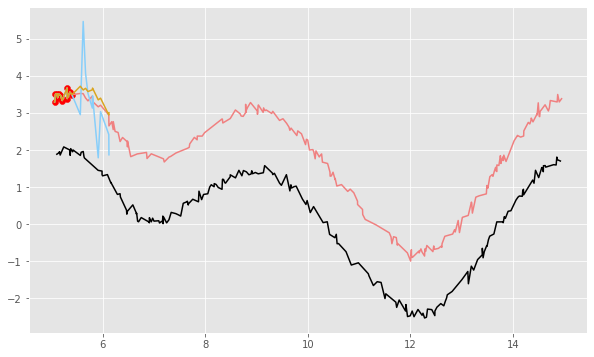

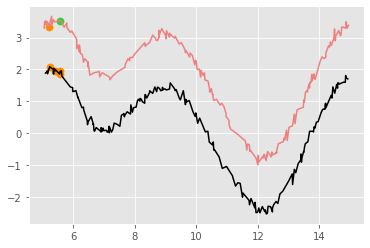

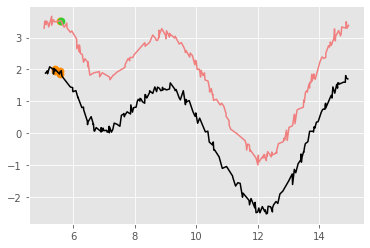

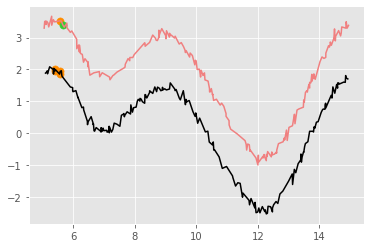

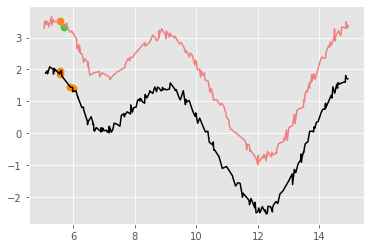

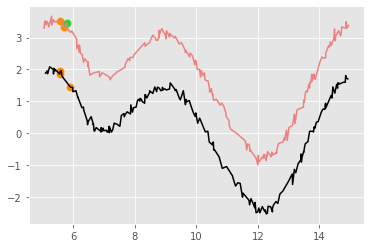

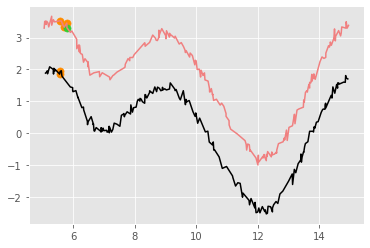

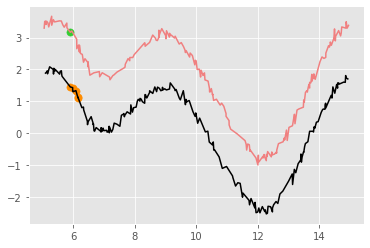

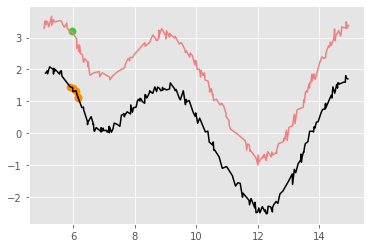

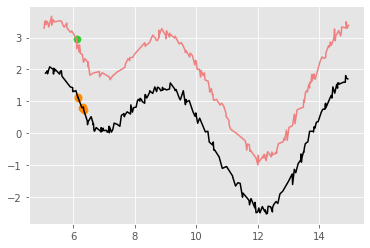

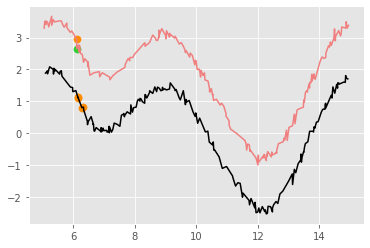

In [8]:
# for i in range(50):
train_step, test_step, loss_object, train_loss, test_loss, m_tr, m_te = grapher.build_graph()
EPOCHS = 75; batch_s  = 64; run = 103; step = 0; train_steps = 35000; heads = 1; ℯ = 256; context = 10
l = [256, 256, 64, 32]
name_comp = 'run_' + str(run) 
logdir = save_dir + '/logs/' + name_comp
writer = tf.summary.create_file_writer(logdir)
folder = save_dir + '/ckpt/check_' + name_comp
#     lr_fn = tf.optimizers.schedules.PolynomialDecay(9e-3, train_steps, 1e-7, 2)
optimizer_c = tf.keras.optimizers.Adam(3e-4)
ℯ, l1, _, l2, l3 = helpers.load_spec(folder, ℯ, l, context,  d = d)
helpers.mkdir(folder)
decoder = experimental2d_model.Decoder(ℯ, l1, l2, l3, num_heads = heads)
ckpt = tf.train.Checkpoint(step=tf.Variable(1), optimizer = optimizer_c, net = decoder)
manager = tf.train.CheckpointManager(ckpt, folder, max_to_keep=3)
ckpt.restore(manager.latest_checkpoint)
if manager.latest_checkpoint:
    print("Restored from {}".format(manager.latest_checkpoint))
idx = int(np.random.choice(np.arange(0, 30000, 1), 1))
xx, yy, no_s_x1, no_s_y1, x_infer, em, s_y_inf,  n_s_x0_p, n_s_y0_p, n_s_x0, n_s_y0 = plotter.infer_plot2D(decoder, data[2][idx, :], data[6][idx, :], data[3][idx, :], data[0][idx, :], samples = 1, num_steps = 10, consec = True, order = True, context_p = 10)

In [11]:
import glob
from PIL import Image

# filepaths
fp_in = image_folder = '/Users/omernivron/Downloads/attention_plots/*.png'
fp_out = "/Users/omernivron/Downloads/image.gif"

# https://pillow.readthedocs.io/en/stable/handbook/image-file-formats.html#gif
img, *imgs = [Image.open(f) for f in sorted(glob.glob(fp_in))]
img.save(fp=fp_out, format='GIF', append_images=imgs,
         save_all=True, duration=700, loop=0)



In [9]:
np.exp(0.09)

1.0941742837052104

In [15]:
np.random.normal(3.58, 1.1)

6.114804862631699